# Load The Data

In [1595]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1596]:
# Settings
data_path = '../adil-crawler/export/peraturan_2021-05-09'
data_path_out = 'peraturan_fixed.json'
df = pd.read_json(data_path)

In [1597]:
df.head()

,id,source,document,document_status,jenis_peraturan,nomor_peraturan,tahun_peraturan,tentang,tgl_ditetapkan,nomor_ln,nomor_tln,tgl_diundangkan,category,memiliki_dasar_hukum,dasar_hukum_dari,mencabut,dilaksanakan_oleh_peraturan_pelaksana,ditafsirkan,instansi,nomor_bn,nomor_tbn,diubah_oleh,dicabut_oleh,mengubah,menafsirkan,peraturan_pelaksana_dari,daerah_id,nomor_ld,nomor_tld
0,11e44c4ed09124909b9c313231363531,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/201...,[200],Peraturan Presiden,23,2014,PENDIRIAN UNIVERSITAS TIDAR,2014-04-01,63.0,NaN,2014-04-01,"[HAM, Pendidikan & Kebudayaan]","[11e44c4ebd49cfc093ae313231363139, 11e44c4e8d8...",[11e6d7078d8710f0b89c313433363532],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11e44c4ea421ce60bfd2313231353337,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/200...,"[200, 200]",Undang-Undang,15,2009,Pengesahan Protocol Against The Smuggling of M...,2009-03-16,54.0,4991.0,2009-03-16,"[HAM, Hukum Internasional, Pidana, Tenaga Kerj...","[11e44c4f06a5e860bd8d313231383232, 11e44c4ed71...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11e44c4e535c1b70a21e313231333231,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/200...,"[200, 200]",Undang-Undang,5,2009,Pengesahan United Nations Convention Against T...,2009-01-12,5.0,4960.0,2009-01-12,"[Hukum Internasional, HAM, Pidana]","[11e58ce1a826e0a0b379313131343132, 11e44c4f06a...","[11e44c4e9a83706087ca313231353231, 11e44c4ea42...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11e44c4e9a83706087ca313231353231,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/200...,"[200, 200]",Undang-Undang,14,2009,"Pengesahan Protocol To Prevent, Suppress and P...",2009-03-05,53.0,4990.0,2009-03-05,"[Hukum Internasional, HAM, Pidana]","[11e58ce1a826e0a0b379313131343132, 11e44c4f06a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11e44c4ecfb12b10a863313231363530,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/201...,[200],Peraturan Presiden,23,2011,RENCANA AKSI NASIONAL HAK ASASI MANUSIA INDONE...,2011-04-11,NaN,NaN,2011-04-11,[HAM],"[11e44c4e6fbe56808064313231343039, 11e44c4e666...",NaN,[11e44c4f0fbff7f0a66a313231383337],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1598]:
# Get Data Frame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     269 non-null    object 
 1   source                                 269 non-null    object 
 2   document                               269 non-null    object 
 3   document_status                        269 non-null    object 
 4   jenis_peraturan                        269 non-null    object 
 5   nomor_peraturan                        269 non-null    object 
 6   tahun_peraturan                        269 non-null    int64  
 7   tentang                                269 non-null    object 
 8   tgl_ditetapkan                         196 non-null    object 
 9   nomor_ln                               151 non-null    float64
 10  nomor_tln                              131 non-null    float64
 11  tgl_di

# Convert JSON Data

In [1599]:
# Load json data and turn into dictionaries

with open(data_path, 'r', encoding='utf-8') as f:
    data = json.loads(f.read())

In [1600]:
# Normalized all
normal_df = pd.json_normalize(data)
# Enlarge column width
normal_df.head().style.set_properties(subset=['source'], **{'width': '100px'})

,id,source,document,document_status,jenis_peraturan,nomor_peraturan,tahun_peraturan,tentang,tgl_ditetapkan,nomor_ln,nomor_tln,tgl_diundangkan,category,memiliki_dasar_hukum,dasar_hukum_dari,mencabut,dilaksanakan_oleh_peraturan_pelaksana,ditafsirkan,instansi,nomor_bn,nomor_tbn,diubah_oleh,dicabut_oleh,mengubah,menafsirkan,peraturan_pelaksana_dari,daerah_id,nomor_ld,nomor_tld
0,11e44c4ed09124909b9c313231363531,https://peraturan.go.id/peraturan/view.html?id=11e44c4ed09124909b9c313231363531,['https://peraturan.go.id/common/dokumen/ln/2014/ps23-2014.pdf'],[200],Peraturan Presiden,23,2014,PENDIRIAN UNIVERSITAS TIDAR,2014-04-01,63,None,2014-04-01,"['HAM', 'Pendidikan & Kebudayaan']","['11e44c4ebd49cfc093ae313231363139', '11e44c4e8d85a200b146313231343539', '11e44c4ea9755c808dde313231353436', '11e44c4e42dc10c0b144313231323534']",['11e6d7078d8710f0b89c313433363532'],nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,11e44c4ea421ce60bfd2313231353337,https://peraturan.go.id/peraturan/view.html?id=11e44c4ea421ce60bfd2313231353337,"['https://peraturan.go.id/common/dokumen/ln/2009/uu15-2009pjl.pdf', 'https://peraturan.go.id/common/dokumen/ln/2009/uu15-2009lmp.pdf']","[200, 200]",Undang-Undang,15,2009,"Pengesahan Protocol Against The Smuggling of Migrants By Land, Sea and Air, Supplementing The United Nations Convention Against Transnational Organized Crime (Protokol Menentang Penyelundupan Migran Melalui Darat, Laut, dan Udara, Melengkapi Konvensi Perserikatan Bangsa-Bangsa Menentang Tindak Pidana Transnasional yang Terorganisasi)",2009-03-16,54,4991,2009-03-16,"['HAM', 'Hukum Internasional', 'Pidana', 'Tenaga Kerja', 'Transportasi']","['11e44c4f06a5e860bd8d313231383232', '11e44c4ed7192c70995c313231373032', '11e44c4e535c1b70a21e313231333231']",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,11e44c4e535c1b70a21e313231333231,https://peraturan.go.id/peraturan/view.html?id=11e44c4e535c1b70a21e313231333231,"['https://peraturan.go.id/common/dokumen/ln/2009/uu5-2009bt.pdf', 'https://peraturan.go.id/common/dokumen/ln/2009/uu5-2009pjl.pdf']","[200, 200]",Undang-Undang,5,2009,Pengesahan United Nations Convention Against Transnational Organized Crime (Konvensi Perserikatan Bangsa-Bangsa Menentang Tindak Pidana Transnasional Yang Terorganisasi),2009-01-12,5,4960,2009-01-12,"['Hukum Internasional', 'HAM', 'Pidana']","['11e58ce1a826e0a0b379313131343132', '11e44c4f06a5e860bd8d313231383232', '11e44c4ed7192c70995c313231373032']","['11e44c4e9a83706087ca313231353231', '11e44c4ea421ce60bfd2313231353337', '11e50dac4b16756ab754313430323134']",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,11e44c4e9a83706087ca313231353231,https://peraturan.go.id/peraturan/view.html?id=11e44c4e9a83706087ca313231353231,"['https://peraturan.go.id/common/dokumen/ln/2009/uu14-2009bt.pdf', 'https://peraturan.go.id/common/dokumen/ln/2009/uu14-2009pjl.pdf']","[200, 200]",Undang-Undang,14,2009,"Pengesahan Protocol To Prevent, Suppress and Punish Trafficking In Persons, Especially Women and Children, Supplementing The United Nations Convention Against Transnational Organized Crime (Protokol Untuk Mencegah, Menindak, dan Menghukum Perdagangan Orang, Terutama Perempuan dan Anak-Anak, Melengkapi Konvensi Perserikatan Bangsa-Bangsa Menentang Tindak Pidana Transnasional yang Terorganisasi)",2009-03-05,53,4990,2009-03-05,"['Hukum Internasional', 'HAM', 'Pidana']","['11e58ce1a826e0a0b379313131343132', '11e44c4f06a5e860bd8d313231383232', '11e44c4ed7192c70995c313231373032', '11e44c4ed2fc2ca0ad1e313231363535', '11e44c4ec9621600c03f313231363339', '11e44c4e535c1b70a21e313231333231']",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,11e44c4ecfb12b10a863313231363530,https://peraturan.go.id/peraturan/view.html?id=11e44c4ecfb12b10a863313231363530,['https://peraturan.go.id/common/dokumen/ln/2011/ps23-2011.pdf'],[200],Peraturan Presiden,23,2011,RENCANA AKSI NASIONAL HAK ASASI MANUSIA INDONESIA TAHUN 2011-2014,2011-04-11,None,None,2011-04-11,['HAM'],"['11e44c4e6fbe5

In [1601]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     269 non-null    object 
 1   source                                 269 non-null    object 
 2   document                               269 non-null    object 
 3   document_status                        269 non-null    object 
 4   jenis_peraturan                        269 non-null    object 
 5   nomor_peraturan                        269 non-null    object 
 6   tahun_peraturan                        269 non-null    object 
 7   tentang                                269 non-null    object 
 8   tgl_ditetapkan                         196 non-null    object 
 9   nomor_ln                               151 non-null    object 
 10  nomor_tln                              131 non-null    object 
 11  tgl_di

In [1602]:
# Set Max Column Display
pd.set_option("display.max_columns", 100)

In [1603]:
# 
normal_df.head().style.set_properties(subset=['source'], **{'width': '100px'})

,id,source,document,document_status,jenis_peraturan,nomor_peraturan,tahun_peraturan,tentang,tgl_ditetapkan,nomor_ln,nomor_tln,tgl_diundangkan,category,memiliki_dasar_hukum,dasar_hukum_dari,mencabut,dilaksanakan_oleh_peraturan_pelaksana,ditafsirkan,instansi,nomor_bn,nomor_tbn,diubah_oleh,dicabut_oleh,mengubah,menafsirkan,peraturan_pelaksana_dari,daerah_id,nomor_ld,nomor_tld
0,11e44c4ed09124909b9c313231363531,https://peraturan.go.id/peraturan/view.html?id=11e44c4ed09124909b9c313231363531,['https://peraturan.go.id/common/dokumen/ln/2014/ps23-2014.pdf'],[200],Peraturan Presiden,23,2014,PENDIRIAN UNIVERSITAS TIDAR,2014-04-01,63,None,2014-04-01,"['HAM', 'Pendidikan & Kebudayaan']","['11e44c4ebd49cfc093ae313231363139', '11e44c4e8d85a200b146313231343539', '11e44c4ea9755c808dde313231353436', '11e44c4e42dc10c0b144313231323534']",['11e6d7078d8710f0b89c313433363532'],nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,11e44c4ea421ce60bfd2313231353337,https://peraturan.go.id/peraturan/view.html?id=11e44c4ea421ce60bfd2313231353337,"['https://peraturan.go.id/common/dokumen/ln/2009/uu15-2009pjl.pdf', 'https://peraturan.go.id/common/dokumen/ln/2009/uu15-2009lmp.pdf']","[200, 200]",Undang-Undang,15,2009,"Pengesahan Protocol Against The Smuggling of Migrants By Land, Sea and Air, Supplementing The United Nations Convention Against Transnational Organized Crime (Protokol Menentang Penyelundupan Migran Melalui Darat, Laut, dan Udara, Melengkapi Konvensi Perserikatan Bangsa-Bangsa Menentang Tindak Pidana Transnasional yang Terorganisasi)",2009-03-16,54,4991,2009-03-16,"['HAM', 'Hukum Internasional', 'Pidana', 'Tenaga Kerja', 'Transportasi']","['11e44c4f06a5e860bd8d313231383232', '11e44c4ed7192c70995c313231373032', '11e44c4e535c1b70a21e313231333231']",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,11e44c4e535c1b70a21e313231333231,https://peraturan.go.id/peraturan/view.html?id=11e44c4e535c1b70a21e313231333231,"['https://peraturan.go.id/common/dokumen/ln/2009/uu5-2009bt.pdf', 'https://peraturan.go.id/common/dokumen/ln/2009/uu5-2009pjl.pdf']","[200, 200]",Undang-Undang,5,2009,Pengesahan United Nations Convention Against Transnational Organized Crime (Konvensi Perserikatan Bangsa-Bangsa Menentang Tindak Pidana Transnasional Yang Terorganisasi),2009-01-12,5,4960,2009-01-12,"['Hukum Internasional', 'HAM', 'Pidana']","['11e58ce1a826e0a0b379313131343132', '11e44c4f06a5e860bd8d313231383232', '11e44c4ed7192c70995c313231373032']","['11e44c4e9a83706087ca313231353231', '11e44c4ea421ce60bfd2313231353337', '11e50dac4b16756ab754313430323134']",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,11e44c4e9a83706087ca313231353231,https://peraturan.go.id/peraturan/view.html?id=11e44c4e9a83706087ca313231353231,"['https://peraturan.go.id/common/dokumen/ln/2009/uu14-2009bt.pdf', 'https://peraturan.go.id/common/dokumen/ln/2009/uu14-2009pjl.pdf']","[200, 200]",Undang-Undang,14,2009,"Pengesahan Protocol To Prevent, Suppress and Punish Trafficking In Persons, Especially Women and Children, Supplementing The United Nations Convention Against Transnational Organized Crime (Protokol Untuk Mencegah, Menindak, dan Menghukum Perdagangan Orang, Terutama Perempuan dan Anak-Anak, Melengkapi Konvensi Perserikatan Bangsa-Bangsa Menentang Tindak Pidana Transnasional yang Terorganisasi)",2009-03-05,53,4990,2009-03-05,"['Hukum Internasional', 'HAM', 'Pidana']","['11e58ce1a826e0a0b379313131343132', '11e44c4f06a5e860bd8d313231383232', '11e44c4ed7192c70995c313231373032', '11e44c4ed2fc2ca0ad1e313231363535', '11e44c4ec9621600c03f313231363339', '11e44c4e535c1b70a21e313231333231']",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,11e44c4ecfb12b10a863313231363530,https://peraturan.go.id/peraturan/view.html?id=11e44c4ecfb12b10a863313231363530,['https://peraturan.go.id/common/dokumen/ln/2011/ps23-2011.pdf'],[200],Peraturan Presiden,23,2011,RENCANA AKSI NASIONAL HAK ASASI MANUSIA INDONESIA TAHUN 2011-2014,2011-04-11,None,None,2011-04-11,['HAM'],"['11e44c4e6fbe5

# Exploratory Analysis

### Document Column

In [1604]:
multi_docs = normal_df['document'].apply(lambda x: True if len(x) > 1 else False)

# Jumlah peraturan dengan >1 dokumen
multi_docs[multi_docs].count()

61

In [1605]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     269 non-null    object 
 1   source                                 269 non-null    object 
 2   document                               269 non-null    object 
 3   document_status                        269 non-null    object 
 4   jenis_peraturan                        269 non-null    object 
 5   nomor_peraturan                        269 non-null    object 
 6   tahun_peraturan                        269 non-null    object 
 7   tentang                                269 non-null    object 
 8   tgl_ditetapkan                         196 non-null    object 
 9   nomor_ln                               151 non-null    object 
 10  nomor_tln                              131 non-null    object 
 11  tgl_di

### Visualize Null Data

<AxesSubplot:>

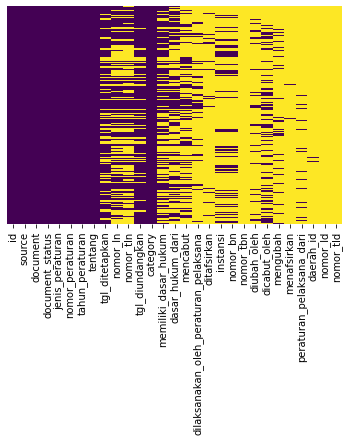

In [1606]:
sns.heatmap(normal_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Category Columns

In [1607]:
normal_df['category']

0                         [HAM, Pendidikan & Kebudayaan]
1      [HAM, Hukum Internasional, Pidana, Tenaga Kerj...
2                     [Hukum Internasional, HAM, Pidana]
3                     [Hukum Internasional, HAM, Pidana]
4                                                  [HAM]
                             ...                        
264                                                   []
265                                                   []
266                                                   []
267                                                   []
268                                                   []
Name: category, Length: 269, dtype: object

In [1608]:
empty_category = normal_df['category'].apply(lambda x: True if len(x) == 0 else False)
empty_category[empty_category]

27     True
43     True
51     True
52     True
53     True
       ... 
264    True
265    True
266    True
267    True
268    True
Name: category, Length: 103, dtype: bool

In [1609]:
# Number of no category
empty_category[empty_category].sum()

103

In [1610]:
# Fill the empty category
def fill_empty_cat(x):
    if len(x) == 0:
        x.append('Uncategorized')
    return x

normal_df['category'] = normal_df['category'].apply(lambda x: fill_empty_cat(x))

In [1611]:
normal_df['category']

0                         [HAM, Pendidikan & Kebudayaan]
1      [HAM, Hukum Internasional, Pidana, Tenaga Kerj...
2                     [Hukum Internasional, HAM, Pidana]
3                     [Hukum Internasional, HAM, Pidana]
4                                                  [HAM]
                             ...                        
264                                      [Uncategorized]
265                                      [Uncategorized]
266                                      [Uncategorized]
267                                      [Uncategorized]
268                                      [Uncategorized]
Name: category, Length: 269, dtype: object

In [1612]:
category_list = []
for c in normal_df['category']:
    for x in c:
        category_list.append(x)
cat_series = pd.Series(category_list)

In [1613]:
cat_series

0                          HAM
1      Pendidikan & Kebudayaan
2                          HAM
3          Hukum Internasional
4                       Pidana
                ...           
391              Uncategorized
392              Uncategorized
393              Uncategorized
394              Uncategorized
395              Uncategorized
Length: 396, dtype: object

In [1614]:
cat_series.nunique()

38

In [1615]:
pd.set_option("display.max_rows", 20)
cat_series.value_counts().to_frame()

,0
Uncategorized,103
Perdagangan & Industri,23
Korupsi,22
Pidana,22
Politik dan Pemilu,21
...,...
Infrastruktur,1
Akuntabilitas,1
"Pers, Telekomunikasi & Informatika",1
Kesehatan,1


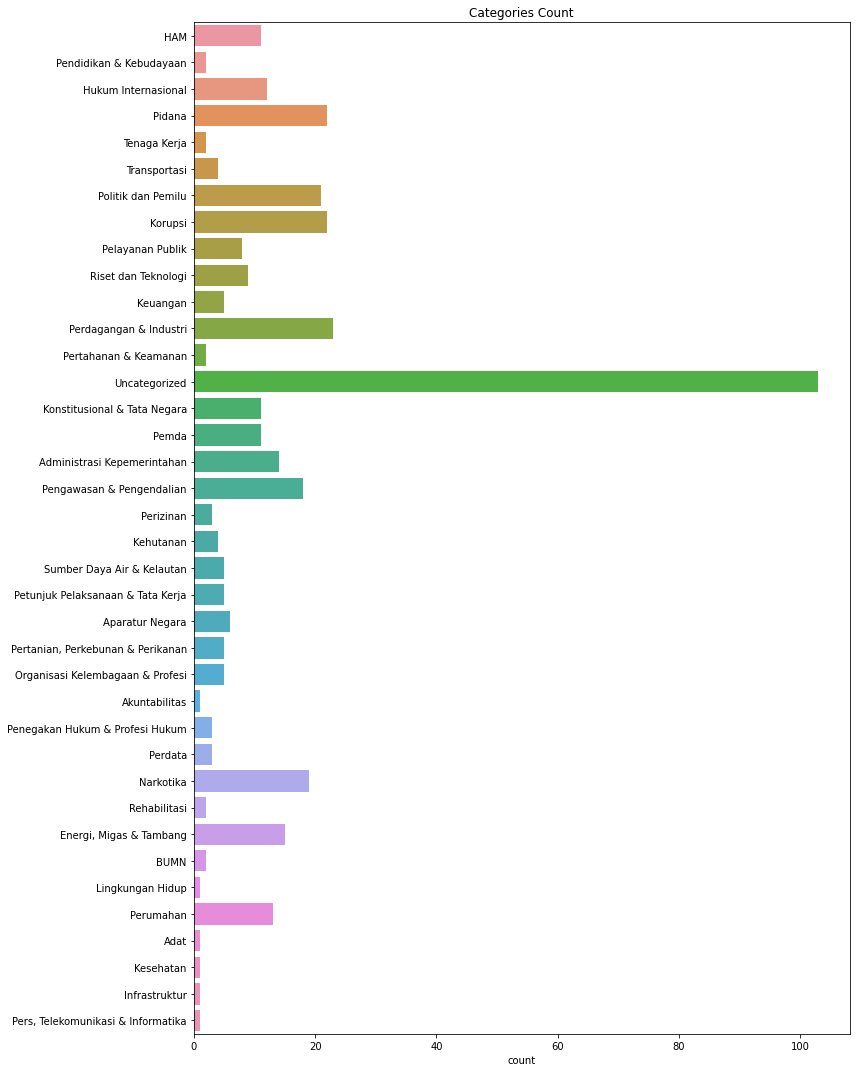

In [1616]:
cat_series_w_cat = cat_series[cat_series != 'Tidak ada kategori']
plt.figure(figsize=(12, 15))
plot = sns.countplot(y=cat_series_w_cat).set_title('Categories Count')
plt.tight_layout()

### Jenis Peraturan Column

In [1617]:
normal_df['jenis_peraturan']

0      Peraturan Presiden
1           Undang-Undang
2           Undang-Undang
3           Undang-Undang
4      Peraturan Presiden
              ...        
264    Peraturan Presiden
265     Peraturan Menteri
266     Peraturan Menteri
267     Peraturan Menteri
268    Peraturan Presiden
Name: jenis_peraturan, Length: 269, dtype: object

In [1618]:
# Find Null Values
normal_df['jenis_peraturan'].isna().sum()

0

In [1619]:
# Find unique values
normal_df['jenis_peraturan'].nunique()

11

In [1620]:
# Count each unique values on how many appearances
normal_df['jenis_peraturan'].value_counts()

Undang-Undang                                   124
Peraturan Menteri                                46
Putusan Mahkamah Konstitusi                      24
Peraturan Presiden                               22
Peraturan Lembaga Pemerintah Non Kementerian     19
Peraturan Pemerintah                             19
Peraturan Pemerintah Pengganti Undang-undang      5
Keputusan Presiden                                4
Instruksi Presiden                                2
Peraturan Kolonial                                2
Peraturan Daerah                                  2
Name: jenis_peraturan, dtype: int64

<AxesSubplot:xlabel='count', ylabel='jenis_peraturan'>

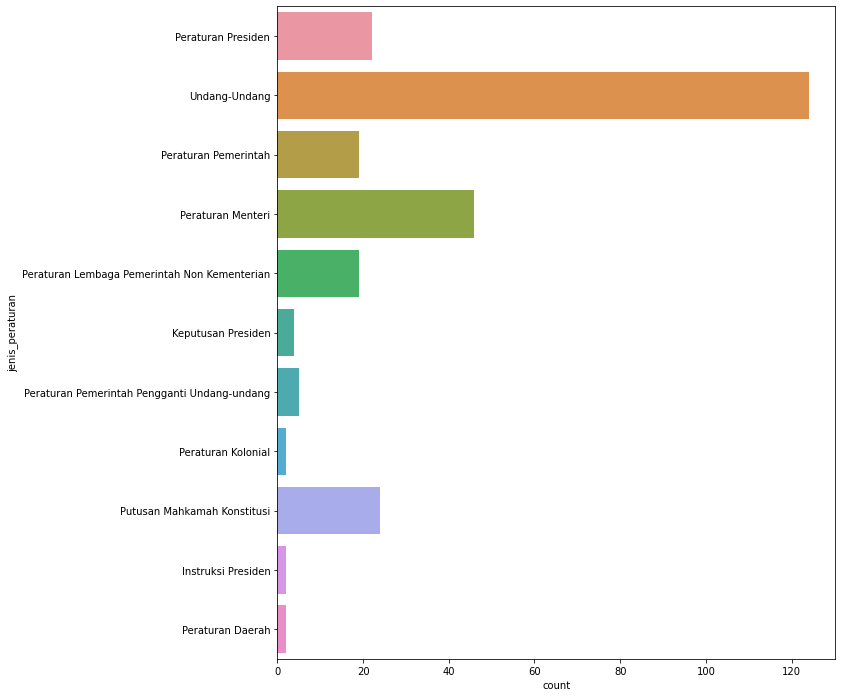

In [1621]:
# Plot the count for jenis peraturan column
plt.figure(figsize=(10, 12))
sns.countplot(y=normal_df['jenis_peraturan'])

### Tanggal Diterapkan Column

In [1622]:
# initiate the series
tanggal = normal_df['tgl_ditetapkan']
tanggal

0      2014-04-01
1      2009-03-16
2      2009-01-12
3      2009-03-05
4      2011-04-11
          ...    
264    2008-04-04
265    2013-07-26
266    2015-02-06
267    2014-08-06
268    2011-03-22
Name: tgl_ditetapkan, Length: 269, dtype: object

In [1623]:
# find NaN values
tanggal[tanggal.isna()]

9      None
10     None
14     None
16     None
27     None
       ... 
252    None
253    None
255    None
262    None
263    None
Name: tgl_ditetapkan, Length: 73, dtype: object

In [1624]:
# Fill in missing data
normal_df['tgl_ditetapkan'] = tanggal.fillna(normal_df['tahun_peraturan'])
normal_df['tgl_ditetapkan']

0      2014-04-01
1      2009-03-16
2      2009-01-12
3      2009-03-05
4      2011-04-11
          ...    
264    2008-04-04
265    2013-07-26
266    2015-02-06
267    2014-08-06
268    2011-03-22
Name: tgl_ditetapkan, Length: 269, dtype: object

In [1625]:
normal_df.tail()

,id,source,document,document_status,jenis_peraturan,nomor_peraturan,tahun_peraturan,tentang,tgl_ditetapkan,nomor_ln,nomor_tln,tgl_diundangkan,category,memiliki_dasar_hukum,dasar_hukum_dari,mencabut,dilaksanakan_oleh_peraturan_pelaksana,ditafsirkan,instansi,nomor_bn,nomor_tbn,diubah_oleh,dicabut_oleh,mengubah,menafsirkan,peraturan_pelaksana_dari,daerah_id,nomor_ld,nomor_tld
264,11e44c4ecfa6f34086b9313231363530,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/200...,[200],Peraturan Presiden,23,2008,UANG KEHORMATAN DAN HAK-HAK LAINNYA BAGI HAKIM...,2008-04-04,None,None,2008-04-04,[Uncategorized],"[11e44c4e9a448ab090ab313231353230, 11e44c4e345...",[11e44c503b2d2050a8ce313232373030],NaN,NaN,NaN,NaN,NaN,NaN,[11e44c503b2d2050a8ce313232373030],[11e44c4e49d94360b0e9313231333035],NaN,NaN,[11e44c4ed58a2f60a872313231373030],NaN,NaN,NaN
265,11e44c50bf05da808b3e313233303431,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/bn/201...,[200],Peraturan Menteri,21,2013,PENYELENGGARAAN JASA PENYEDIAAN KONTEN PADA JA...,2013-07-26,NaN,NaN,2013-08-06,[Uncategorized],NaN,NaN,NaN,[11e6f739c78adde8ac54313335373031],NaN,Kementerian Komunikasi dan Informatika,979,NaN,NaN,[11e6f739c78adde8ac54313335373031],NaN,NaN,NaN,NaN,NaN,NaN
266,11e57ac75d457f5a90c9313032303338,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/bn/201...,[404],Peraturan Menteri,6,2015,PERUBAHAN KETIGA ATAS PERATURAN MENTERI KOMUNI...,2015-02-06,NaN,NaN,2015-02-06,[Uncategorized],NaN,NaN,NaN,NaN,NaN,Kementerian Komunikasi dan Informatika,210,NaN,NaN,[11e6f739c78adde8ac54313335373031],NaN,NaN,NaN,NaN,NaN,NaN
267,11e55cf2c63f6efaa37a313131353438,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/bn/201...,[200],Peraturan Menteri,24,2014,PERUBAHAN KEDUA ATAS PERATURAN MENTERI KOMUNIK...,2014-08-06,NaN,NaN,2014-08-07,[Uncategorized],NaN,NaN,NaN,NaN,NaN,Kementerian Komunikasi dan Informatika,1075,NaN,NaN,[11e6f739c78adde8ac54313335373031],NaN,NaN,NaN,NaN,NaN,NaN
268,11e44c4ebb124b60b246313231363135,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/201...,[200],Peraturan Presiden,20,2011,PERUBAHAN ATAS PERATURAN PRESIDEN NOMOR 96 TAH...,2011-03-22,None,None,2011-03-22,[Uncategorized],"[11e44c4e34b7bea09d4d313231323330, 11e44c4f67a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[11e44c4f67a2aef0a3b3313232313035],NaN,NaN,NaN,NaN,NaN


### Nomor Peraturan Column

In [1626]:
nomor = normal_df['nomor_peraturan']
nomor

0      23
1      15
2       5
3      14
4      23
       ..
264    23
265    21
266     6
267    24
268    20
Name: nomor_peraturan, Length: 269, dtype: object

In [1627]:
nomor.nunique()

119

In [1628]:
# Find Missing Values
nomor[nomor.isna()]

Series([], Name: nomor_peraturan, dtype: object)

In [1629]:
# Fill missing Values
normal_df['nomor_peraturan'] = nomor.fillna('Tidak ada nomor peraturan')

In [1630]:
# Check if the data only contains number
nomor = normal_df['nomor_peraturan']
num_only = nomor.apply(lambda x: True if "/" not in x else False)

c:\users\reactive\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nomor_peraturan', ylabel='count'>

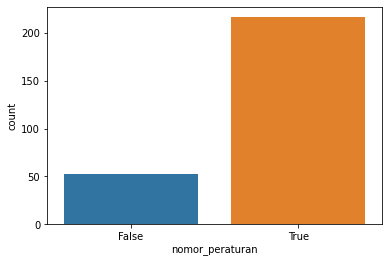

In [1631]:
sns.countplot(num_only)

### Drop columns that have a lot of nulls

In [1632]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     269 non-null    object 
 1   source                                 269 non-null    object 
 2   document                               269 non-null    object 
 3   document_status                        269 non-null    object 
 4   jenis_peraturan                        269 non-null    object 
 5   nomor_peraturan                        269 non-null    object 
 6   tahun_peraturan                        269 non-null    object 
 7   tentang                                269 non-null    object 
 8   tgl_ditetapkan                         269 non-null    object 
 9   nomor_ln                               151 non-null    object 
 10  nomor_tln                              131 non-null    object 
 11  tgl_di

In [1633]:
# Drop it
normal_df.drop(['nomor_ln', 'nomor_tln', 'nomor_ld', 'nomor_tld', 'nomor_bn', 'nomor_tbn'], axis=1, inplace=True)

In [1634]:
normal_df.head()

,id,source,document,document_status,jenis_peraturan,nomor_peraturan,tahun_peraturan,tentang,tgl_ditetapkan,tgl_diundangkan,category,memiliki_dasar_hukum,dasar_hukum_dari,mencabut,dilaksanakan_oleh_peraturan_pelaksana,ditafsirkan,instansi,diubah_oleh,dicabut_oleh,mengubah,menafsirkan,peraturan_pelaksana_dari,daerah_id
0,11e44c4ed09124909b9c313231363531,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/201...,[200],Peraturan Presiden,23,2014,PENDIRIAN UNIVERSITAS TIDAR,2014-04-01,2014-04-01,"[HAM, Pendidikan & Kebudayaan]","[11e44c4ebd49cfc093ae313231363139, 11e44c4e8d8...",[11e6d7078d8710f0b89c313433363532],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11e44c4ea421ce60bfd2313231353337,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/200...,"[200, 200]",Undang-Undang,15,2009,Pengesahan Protocol Against The Smuggling of M...,2009-03-16,2009-03-16,"[HAM, Hukum Internasional, Pidana, Tenaga Kerj...","[11e44c4f06a5e860bd8d313231383232, 11e44c4ed71...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11e44c4e535c1b70a21e313231333231,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/200...,"[200, 200]",Undang-Undang,5,2009,Pengesahan United Nations Convention Against T...,2009-01-12,2009-01-12,"[Hukum Internasional, HAM, Pidana]","[11e58ce1a826e0a0b379313131343132, 11e44c4f06a...","[11e44c4e9a83706087ca313231353231, 11e44c4ea42...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11e44c4e9a83706087ca313231353231,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/200...,"[200, 200]",Undang-Undang,14,2009,"Pengesahan Protocol To Prevent, Suppress and P...",2009-03-05,2009-03-05,"[Hukum Internasional, HAM, Pidana]","[11e58ce1a826e0a0b379313131343132, 11e44c4f06a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11e44c4ecfb12b10a863313231363530,https://peraturan.go.id/peraturan/view.html?id...,[https://peraturan.go.id/common/dokumen/ln/201...,[200],Peraturan Presiden,23,2011,RENCANA AKSI NASIONAL HAK ASASI MANUSIA INDONE...,2011-04-11,2011-04-11,[HAM],"[11e44c4e6fbe56808064313231343039, 11e44c4e666...",NaN,[11e44c4f0fbff7f0a66a313231383337],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1635]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     269 non-null    object
 1   source                                 269 non-null    object
 2   document                               269 non-null    object
 3   document_status                        269 non-null    object
 4   jenis_peraturan                        269 non-null    object
 5   nomor_peraturan                        269 non-null    object
 6   tahun_peraturan                        269 non-null    object
 7   tentang                                269 non-null    object
 8   tgl_ditetapkan                         269 non-null    object
 9   tgl_diundangkan                        228 non-null    object
 10  category                               269 non-null    object
 11  memiliki_dasar_huku

<AxesSubplot:>

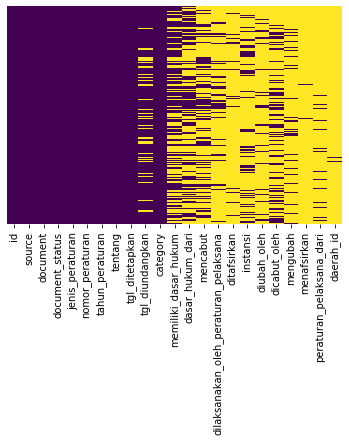

In [1636]:
sns.heatmap(normal_df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

### Convert DataFrame to JSON

In [1637]:
# Normalize more data
ids = normal_df['id']
normal_df.drop(axis=1, columns='id', inplace=True)
normal_df.set_index(ids, inplace=True)
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 11e44c4ed09124909b9c313231363531 to 11e44c4ebb124b60b246313231363135
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   source                                 269 non-null    object
 1   document                               269 non-null    object
 2   document_status                        269 non-null    object
 3   jenis_peraturan                        269 non-null    object
 4   nomor_peraturan                        269 non-null    object
 5   tahun_peraturan                        269 non-null    object
 6   tentang                                269 non-null    object
 7   tgl_ditetapkan                         269 non-null    object
 8   tgl_diundangkan                        228 non-null    object
 9   category                               269 non-null    object
 10  memiliki_dasar_hukum           

In [1638]:
new_json = normal_df.to_json(path_or_buf=data_path_out, orient='index', indent=2, )

In [1639]:
with open(data_path_out, 'r') as f:
    json_out = json.loads(f.read())
json_out

{'11e44c4ed09124909b9c313231363531': {'source': 'https://peraturan.go.id/peraturan/view.html?id=11e44c4ed09124909b9c313231363531',
  'document': ['https://peraturan.go.id/common/dokumen/ln/2014/ps23-2014.pdf'],
  'document_status': [200],
  'jenis_peraturan': 'Peraturan Presiden',
  'nomor_peraturan': '23',
  'tahun_peraturan': '2014',
  'tentang': 'PENDIRIAN UNIVERSITAS TIDAR',
  'tgl_ditetapkan': '2014-04-01',
  'tgl_diundangkan': '2014-04-01',
  'category': ['HAM', 'Pendidikan & Kebudayaan'],
  'memiliki_dasar_hukum': ['11e44c4ebd49cfc093ae313231363139',
   '11e44c4e8d85a200b146313231343539',
   '11e44c4ea9755c808dde313231353436',
   '11e44c4e42dc10c0b144313231323534'],
  'dasar_hukum_dari': ['11e6d7078d8710f0b89c313433363532'],
  'mencabut': None,
  'dilaksanakan_oleh_peraturan_pelaksana': None,
  'ditafsirkan': None,
  'instansi': None,
  'diubah_oleh': None,
  'dicabut_oleh': None,
  'mengubah': None,
  'menafsirkan': None,
  'peraturan_pelaksana_dari': None,
  'daerah_id': None}